<a href="https://colab.research.google.com/github/caromerou/tienda/blob/main/CHALLENGE3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Descargar el archivo CSV directamente desde GitHub
!wget https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/main/data/Alura_Challenge_2.csv -O Alura_Challenge_2.csv

--2025-06-21 01:03:38--  https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/main/data/Alura_Challenge_2.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2025-06-21 01:03:38 ERROR 404: Not Found.



In [21]:
# Archivos en challenge2-data-science-LATAM
!ls /content/challenge2-data-science-LATAM


challenge2-data-science-LATAM  TelecomX_diccionario.md
TelecomX_Data.json	       TelecomX_LATAM.ipynb


In [23]:
import pandas as pd

# Cargar el archivo JSON
df = pd.read_json('/content/challenge2-data-science-LATAM/TelecomX_Data.json')

# Mostrar las primeras filas
df.head()


,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [24]:
import pandas as pd
import json

# Abrimos el archivo para ver su estructura
with open('/content/challenge2-data-science-LATAM/TelecomX_Data.json') as f:
    data = json.load(f)

# Visualizar una muestra de la estructura
import pprint
pprint.pprint(data[0])  # Ver el primer elemento (si es una lista)


{'Churn': 'No',
 'account': {'Charges': {'Monthly': 65.6, 'Total': '593.3'},
             'Contract': 'One year',
             'PaperlessBilling': 'Yes',
             'PaymentMethod': 'Mailed check'},
 'customer': {'Dependents': 'Yes',
              'Partner': 'Yes',
              'SeniorCitizen': 0,
              'gender': 'Female',
              'tenure': 9},
 'customerID': '0002-ORFBO',
 'internet': {'DeviceProtection': 'No',
              'InternetService': 'DSL',
              'OnlineBackup': 'Yes',
              'OnlineSecurity': 'No',
              'StreamingMovies': 'No',
              'StreamingTV': 'Yes',
              'TechSupport': 'Yes'},
 'phone': {'MultipleLines': 'No', 'PhoneService': 'Yes'}}


In [25]:
import json
from IPython.display import display, JSON

with open('/content/challenge2-data-science-LATAM/TelecomX_Data.json') as f:
    data = json.load(f)

# Muestra el primer registro visualmente ordenado
display(JSON(data[0]))


<IPython.core.display.JSON object>

In [26]:
from pandas import json_normalize
import json

# Cargar el JSON
with open('/content/challenge2-data-science-LATAM/TelecomX_Data.json') as f:
    data = json.load(f)

# Desanidar campos anidados
df = json_normalize(
    data,
    sep='_'
)

# Mostrar las primeras filas
df.head()


,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [27]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer_gender            7267 non-null   object 
 3   customer_SeniorCitizen     7267 non-null   int64  
 4   customer_Partner           7267 non-null   object 
 5   customer_Dependents        7267 non-null   object 
 6   customer_tenure            7267 non-null   int64  
 7   phone_PhoneService         7267 non-null   object 
 8   phone_MultipleLines        7267 non-null   object 
 9   internet_InternetService   7267 non-null   object 
 10  internet_OnlineSecurity    7267 non-null   object 
 11  internet_OnlineBackup      7267 non-null   object 
 12  internet_DeviceProtection  7267 non-null   object 
 13  internet_TechSupport       7267 non-null   objec

In [28]:
df.describe()


,customer_SeniorCitizen,customer_tenure,account_Charges_Monthly
count,7267.000000,7267.000000,7267.000000
mean,0.162653,32.346498,64.720098
std,0.369074,24.571773,30.129572
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.425000
50%,0.000000,29.000000,70.300000
75%,0.000000,55.000000,89.875000
max,1.000000,72.000000,118.750000


In [29]:
df.isnull().sum()


,0
customerID,0
Churn,0
customer_gender,0
customer_SeniorCitizen,0
customer_Partner,0
customer_Dependents,0
customer_tenure,0
phone_PhoneService,0
phone_MultipleLines,0
internet_InternetService,0


array([[<Axes: title={'center': 'customer_SeniorCitizen'}>,
        <Axes: title={'center': 'customer_tenure'}>],
       [<Axes: title={'center': 'account_Charges_Monthly'}>, <Axes: >]],
      dtype=object)

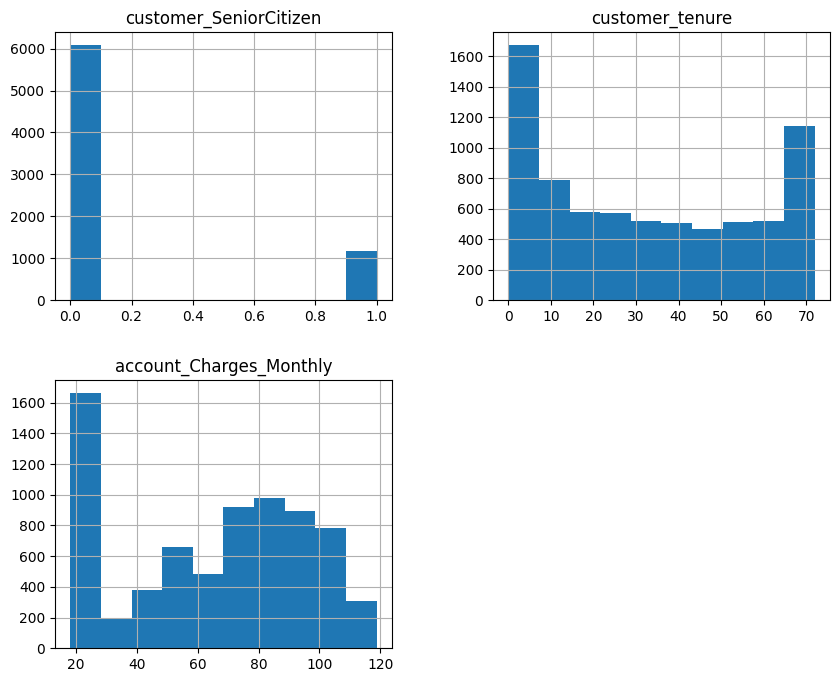

In [30]:
df.hist(figsize=(10, 8))


<Axes: xlabel='Churn'>

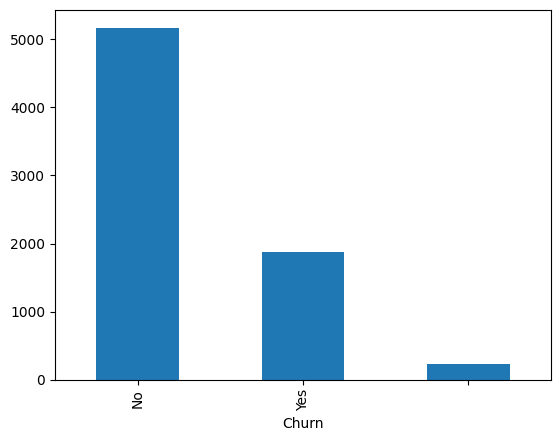

In [31]:
df['Churn'].value_counts().plot(kind='bar')


<Axes: xlabel='account_Contract', ylabel='account_Charges_Monthly'>

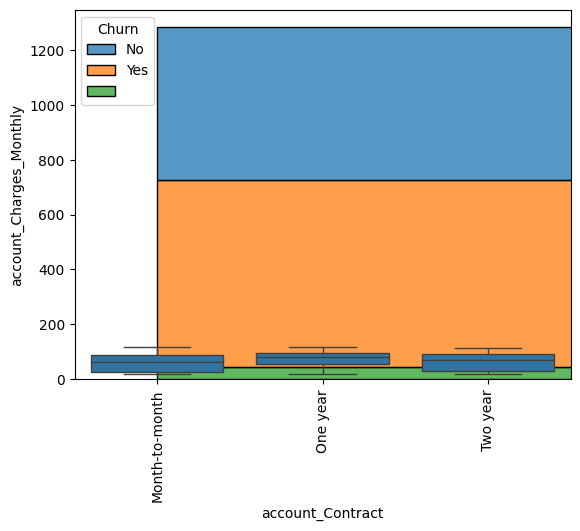

In [32]:
# Porcentaje de churn por tipo de contrato
df.groupby('account_Contract')['Churn'].value_counts(normalize=True).unstack().plot(kind='bar', stacked=True)

# Distribución de cargos mensuales según churn
import seaborn as sns
sns.boxplot(x='Churn', y='account_Charges_Monthly', data=df)

# Relación entre tenure y churn
sns.histplot(data=df, x='customer_tenure', hue='Churn', multiple='stack')


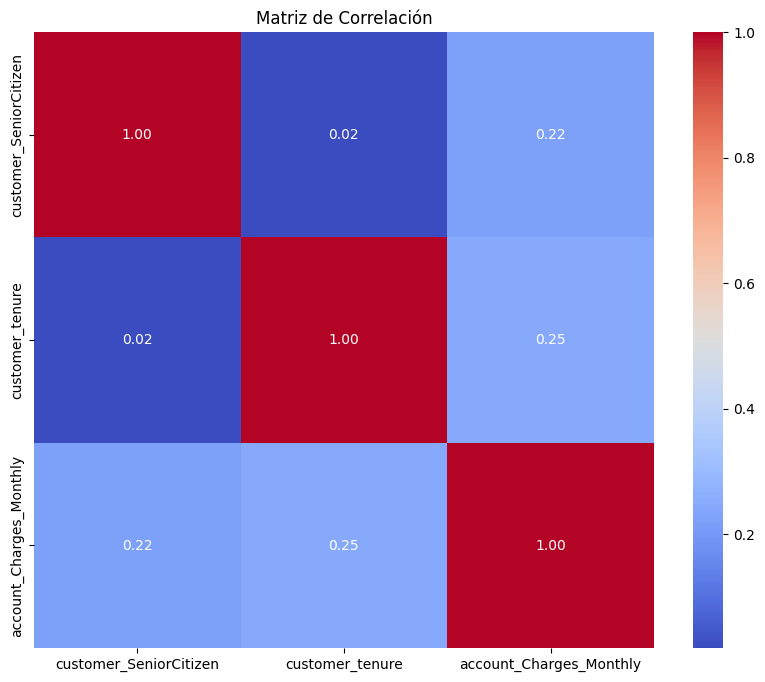

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar solo columnas numéricas
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Calcular la matriz de correlación
corr = numeric_df.corr()

# Graficar la matriz
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación')
plt.show()


Midiendo Churn

In [34]:
tasa_churn = df['Churn'].value_counts(normalize=True)['Yes'] * 100
print(f'Tasa de churn: {tasa_churn:.2f}%')


Tasa de churn: 25.72%


In [35]:
total_churn = df['Churn'].value_counts()['Yes']
print(f'Total de clientes que hicieron churn: {total_churn}')


Total de clientes que hicieron churn: 1869


In [36]:
df.groupby('account_Contract')['Churn'].value_counts(normalize=True).unstack()


Churn,,No,Yes
account_Contract,,,
Month-to-month,0.032459,0.554307,0.413233
One year,0.030283,0.860434,0.109282
Two year,0.027539,0.944923,0.027539
